In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
import pyspark

In [4]:
data = pd.read_csv("Dataset\Dataset.csv")

data.head(10)


age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   
5  37.0            Private  284582.0     Masters           14.0   
6  49.0            Private  160187.0         9th            5.0   
7  52.0   Self-emp-not-inc  209642.0     HS-grad            9.0   
8  31.0            Private   45781.0     Masters           14.0   
9  42.0            Private  159449.0   Bachelors           13.0   

           Marital_Status          Occupation    Relationship    Race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       Sex  Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0     Male        2174.0           0.0            40.0   United-States   <=50K  
1     Male           0.0           0.0            13.0   United-States   <=50K  
2     Male           0.0           0.0            40.0   United-States   <=50K  
3     Male           0.0           0.0            40.0   United-States   <=50K  
4   Female           0.0           0.0            40.0            Cuba   <=50K  
5   Female           0.0           0.0            40.0   United-States   <=50K  
6   Female           0.0           0.0            16.0         Jamaica   <=50K  
7     Male           0.0           0.0            45.0   United-States    >50K  
8   Female       14084.0           0.0            50.0   United-States    >50K  
9     Male        5178.0           0.0            40.0   United-States    >50K

In [5]:
# Manually set column names
column_names = ['age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income']

# Assign column names to the DataFrame
data.columns = column_names

# Display the updated DataFrame
data.head(10)


age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   
5  37.0            Private  284582.0     Masters           14.0   
6  49.0            Private  160187.0         9th            5.0   
7  52.0   Self-emp-not-inc  209642.0     HS-grad            9.0   
8  31.0            Private   45781.0     Masters           14.0   
9  42.0            Private  159449.0   Bachelors           13.0   

           Marital_Status          Occupation    Relationship    Race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       Sex  Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0     Male        2174.0           0.0            40.0   United-States   <=50K  
1     Male           0.0           0.0            13.0   United-States   <=50K  
2     Male           0.0           0.0            40.0   United-States   <=50K  
3     Male           0.0           0.0            40.0   United-States   <=50K  
4   Female           0.0           0.0            40.0            Cuba   <=50K  
5   Female           0.0           0.0            40.0   United-States   <=50K  
6   Female           0.0           0.0            16.0         Jamaica   <=50K  
7     Male           0.0           0.0            45.0   United-States    >50K  
8   Female       14084.0           0.0            50.0   United-States    >50K  
9     Male        5178.0           0.0            40.0   United-States    >50K

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  float64
 1   Workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   Education       48842 non-null  object 
 4   Education_Num   48842 non-null  float64
 5   Marital_Status  48842 non-null  object 
 6   Occupation      48842 non-null  object 
 7   Relationship    48842 non-null  object 
 8   Race            48842 non-null  object 
 9   Sex             48842 non-null  object 
 10  Capital_Gain    48842 non-null  float64
 11  Capital_Loss    48842 non-null  float64
 12  Hours_per_Week  48842 non-null  float64
 13  Native_Country  48842 non-null  object 
 14  Income          48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.describe()

age        fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours_per_Week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [8]:
data

age          Workclass    fnlwgt   Education  Education_Num  \
0      39.0          State-gov   77516.0   Bachelors           13.0   
1      50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2      38.0            Private  215646.0     HS-grad            9.0   
3      53.0            Private  234721.0        11th            7.0   
4      28.0            Private  338409.0   Bachelors           13.0   
...     ...                ...       ...         ...            ...   
48838  64.0                  ?  321403.0     HS-grad            9.0   
48839  38.0            Private  374983.0   Bachelors           13.0   
48840  44.0            Private   83891.0   Bachelors           13.0   
48841  35.0       Self-emp-inc  182148.0   Bachelors           13.0   
48842   NaN                NaN       NaN         NaN            NaN   

            Marital_Status          Occupation     Relationship  \
0            Never-married        Adm-clerical    Not-in-family   
1       Married-civ-spouse     Exec-managerial          Husband   
2                 Divorced   Handlers-cleaners    Not-in-family   
3       Married-civ-spouse   Handlers-cleaners          Husband   
4       Married-civ-spouse      Prof-specialty             Wife   
...                    ...                 ...              ...   
48838              Widowed                   ?   Other-relative   
48839   Married-civ-spouse      Prof-specialty          Husband   
48840             Divorced        Adm-clerical        Own-child   
48841   Married-civ-spouse     Exec-managerial          Husband   
48842                  NaN                 NaN              NaN   

                      Race      Sex  Capital_Gain  Capital_Loss  \
0                    White     Male        2174.0           0.0   
1                    White     Male           0.0           0.0   
2                    White     Male           0.0           0.0   
3                    Black     Male           0.0           0.0   
4                    Black   Female           0.0           0.0   
...                    ...      ...           ...           ...   
48838                Black     Male           0.0           0.0   
48839                White     Male           0.0           0.0   
48840   Asian-Pac-Islander     Male        5455.0           0.0   
48841                White     Male           0.0           0.0   
48842                  NaN      NaN           NaN           NaN   

       Hours_per_Week  Native_Country   Income  
0                40.0   United-States    <=50K  
1                13.0   United-States    <=50K  
2                40.0   United-States    <=50K  
3                40.0   United-States    <=50K  
4                40.0            Cuba    <=50K  
...               ...             ...      ...  
48838            40.0   United-States   <=50K.  
48839            50.0   United-States   <=50K.  
48840            40.0   United-States   <=50K.  
48841            60.0   United-States    >50K.  
48842             NaN             NaN      NaN  

[48843 rows x 15 columns]

pip install data_exploration

In [9]:
Discrete Variable Barplot

SyntaxError: invalid syntax (1950125928.py, line 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8160\327177249.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')


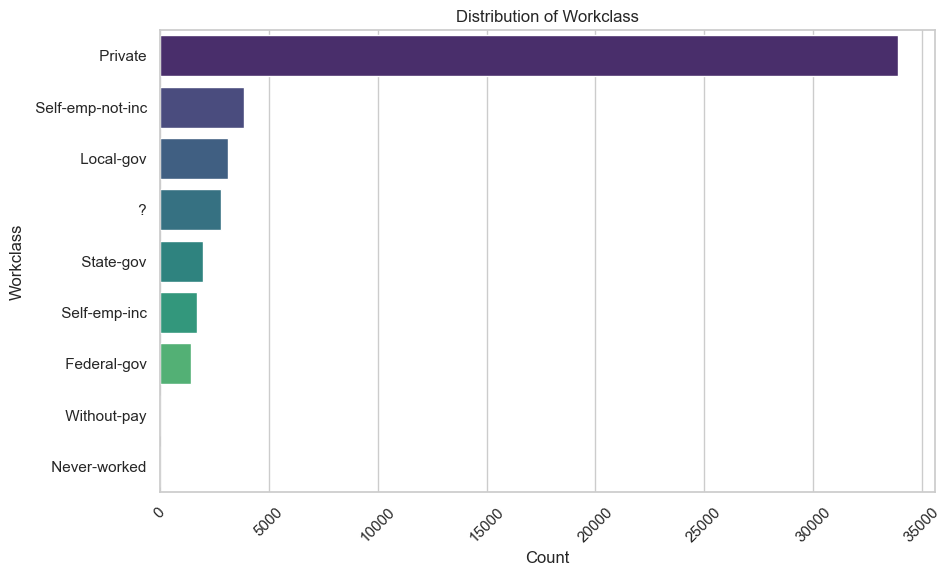

In [10]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Workclass'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')

# Set labels and title
plt.ylabel('Workclass')
plt.xlabel('Count')
plt.title('Distribution of Workclass')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8160\2753986053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


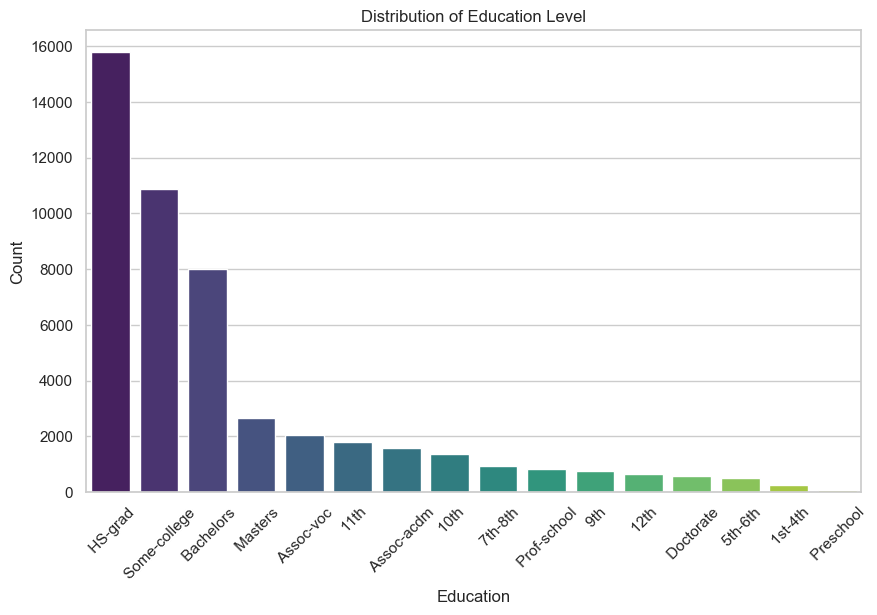

In [11]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Education'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8160\3905324086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


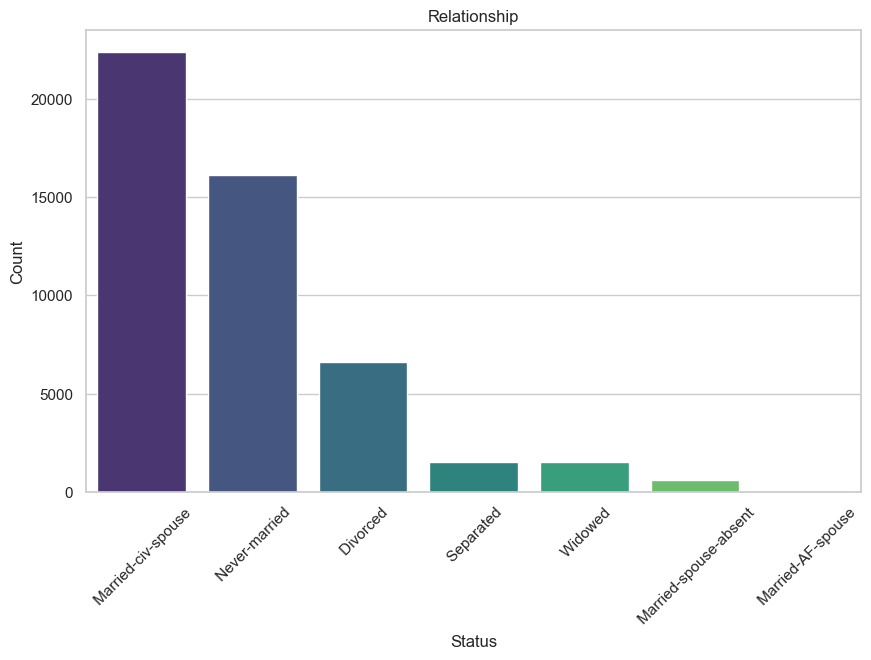

In [12]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Marital_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Relationship')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8160\4283542575.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')


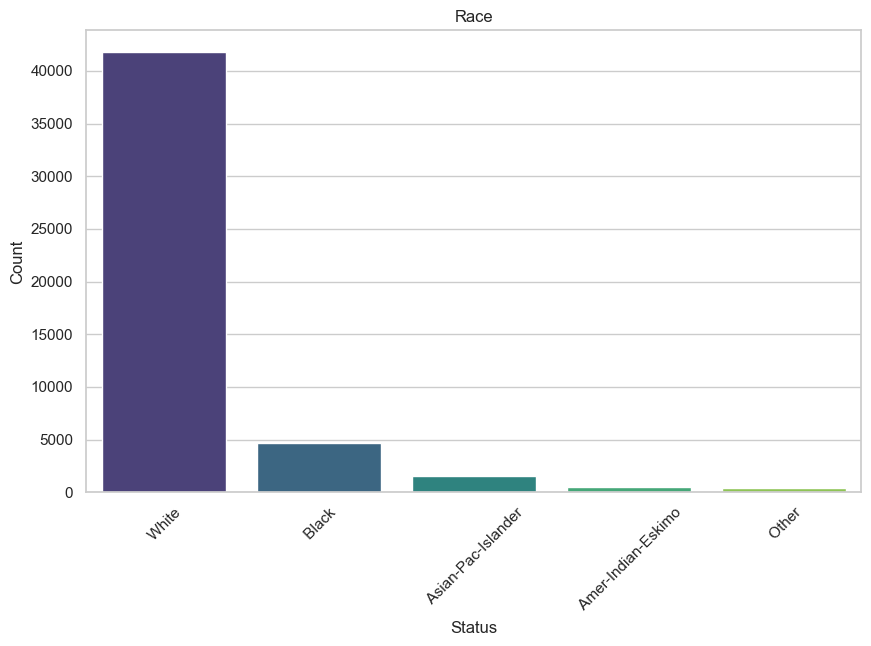

In [13]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Race'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=workclass_counts.index, y=workclass_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Race')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8160\1755400986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')


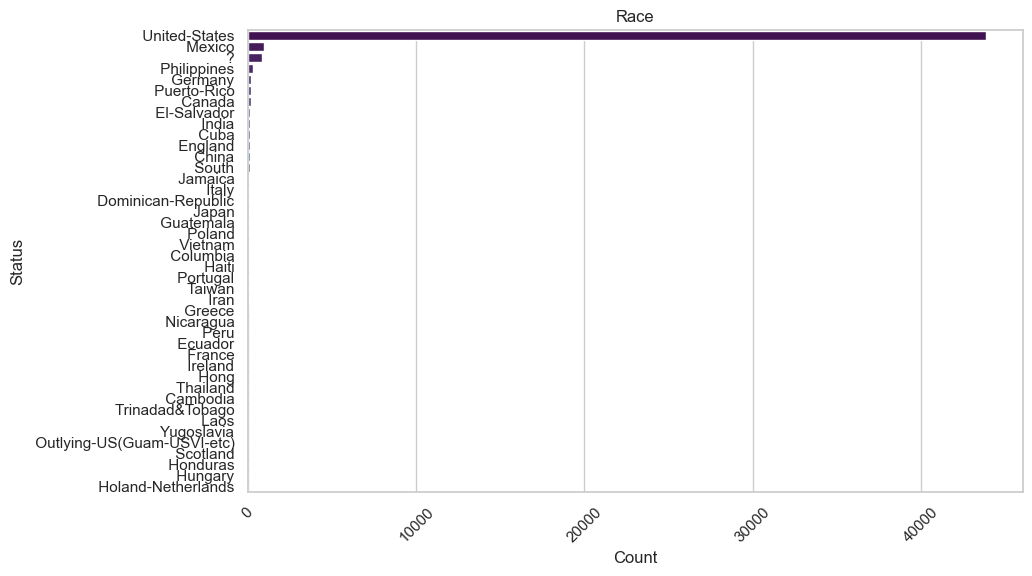

In [14]:
# Count the occurrences of each category in the "Workclass" column
workclass_counts = data['Native_Country'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=workclass_counts.index, x=workclass_counts.values, palette='viridis')

# Set labels and title
plt.ylabel('Status')
plt.xlabel('Count')
plt.title('Race')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

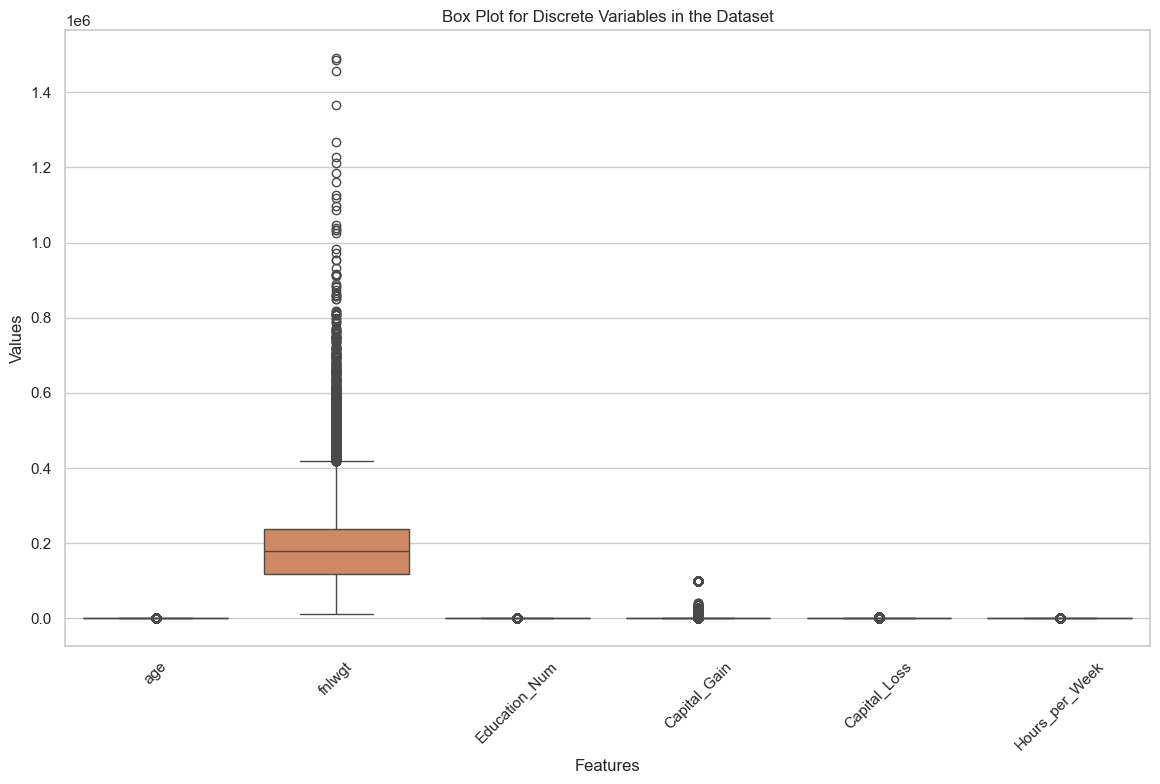

In [15]:
# Create a box plot for the entire dataset
plt.figure(figsize=(14, 8))
sns.boxplot(data=data)

# Set labels and title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plot for Discrete Variables in the Dataset')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
#('age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-per-Week', 'Native-Country', 'Income')

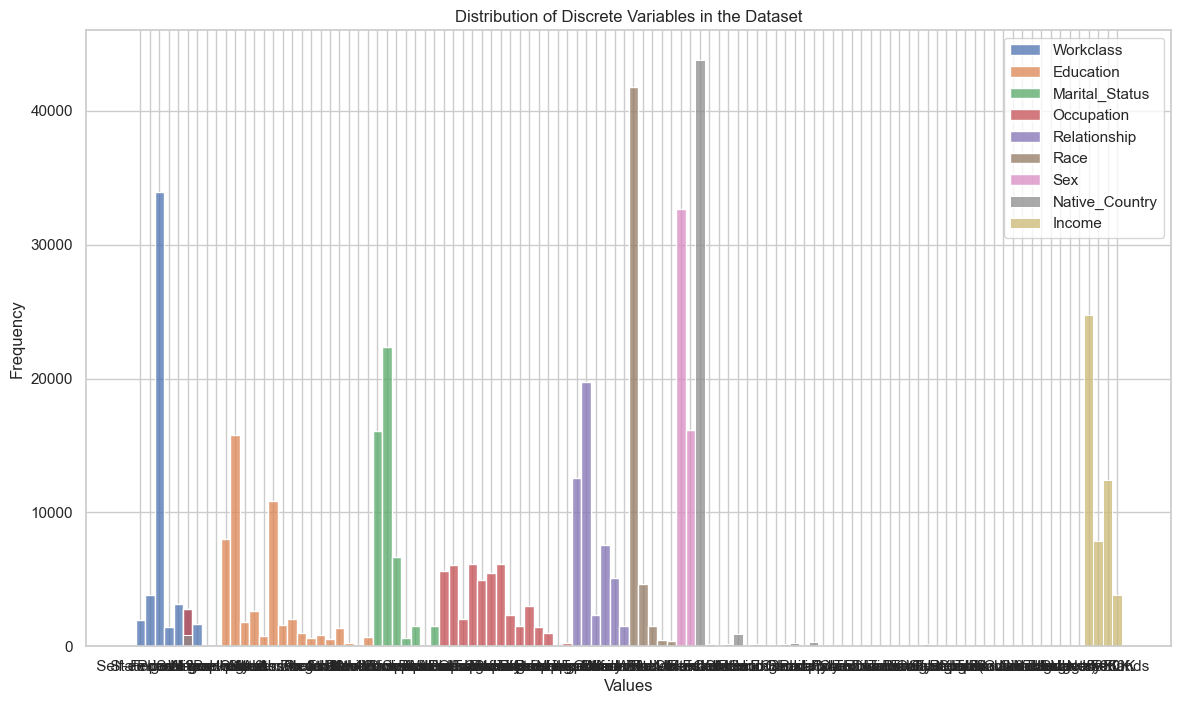

In [16]:
# Select only the discrete variables from the dataset
discrete_columns = data.select_dtypes(include=['int64', 'object']).columns

# Create a distribution plot for each discrete variable
plt.figure(figsize=(14, 8))
for column in discrete_columns:
    sns.histplot(data[column], kde=False, bins=20, label=column)

# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Discrete Variables in the Dataset')

# Add legend for better readability
plt.legend()

# Show the plot
plt.show()

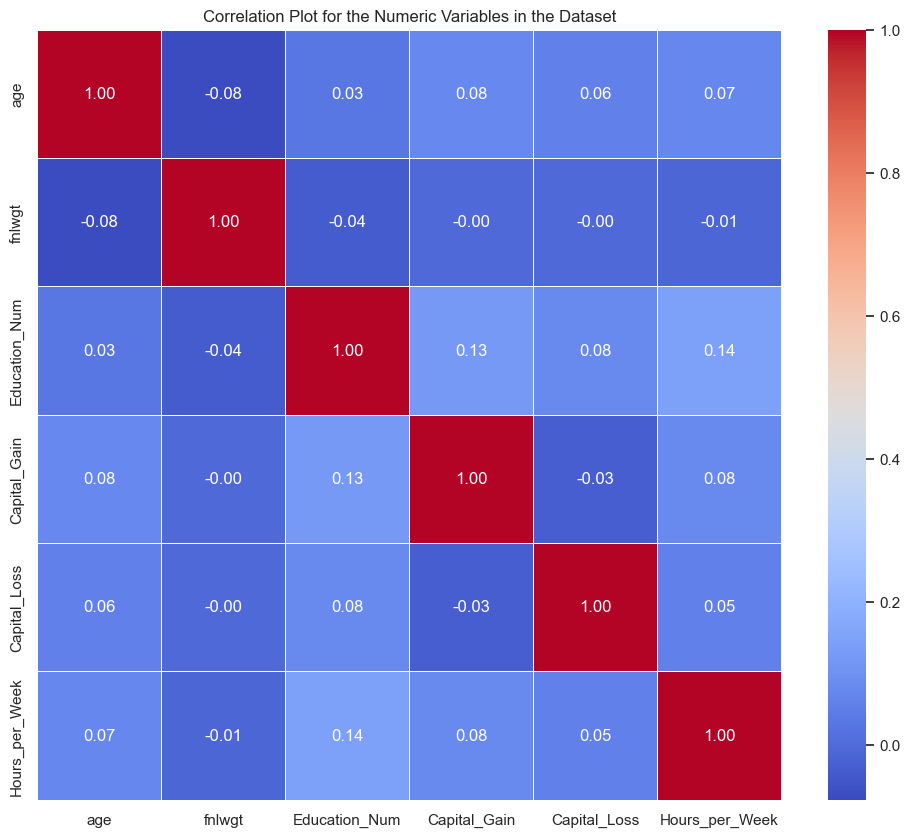

In [17]:
# Select only numeric columns or encode categorical columns
numeric_columns = data.select_dtypes(include=['number']).columns
df_numeric = data[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a correlation plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title('Correlation Plot for the Numeric Variables in the Dataset')

# Show the plot
plt.show()

In [18]:
print(data.head())

    age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0        2174.0           0.0            40.0   Un

In [19]:
filtered_data = data[data['Workclass'].str.strip() == '']
# Print the filtered rows
print(filtered_data)
#data.filter(data['Workclass'] == 'Private').show()

Empty DataFrame
Columns: [age, Workclass, fnlwgt, Education, Education_Num, Marital_Status, Occupation, Relationship, Race, Sex, Capital_Gain, Capital_Loss, Hours_per_Week, Native_Country, Income]
Index: []


In [20]:
# Check for missing values in the dataset
missing_data = data.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'Missing Values']

# Display missing data as a table
print(missing_data)

           Feature  Missing Values
0              age               1
1        Workclass               1
2           fnlwgt               1
3        Education               1
4    Education_Num               1
5   Marital_Status               1
6       Occupation               1
7     Relationship               1
8             Race               1
9              Sex               1
10    Capital_Gain               1
11    Capital_Loss               1
12  Hours_per_Week               1
13  Native_Country               1
14          Income               1


In [21]:
pd.Series(data.fnlwgt.unique()).sort_values()

13258      12285.0
28440      13492.0
19003      13769.0
26085      13862.0
18219      14878.0
           ...    
13044    1366120.0
13898    1455435.0
11597    1484705.0
25230    1490400.0
28523          NaN
Length: 28524, dtype: float64

In [22]:
pd.Series(data.Capital_Gain.unique()).sort_values()

1          0.0
80       114.0
61       401.0
19       594.0
60       914.0
        ...   
48     27828.0
9      34095.0
90     41310.0
38     99999.0
123        NaN
Length: 124, dtype: float64

In [23]:
print(data.shape)

(48843, 15)


In [24]:
# Function to remove outliers based on IQR
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
    
    # Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1 ",Q1)
print("Q3 ",Q3)
print("IQR ",IQR)
print("lower_bound ",lower_bound)
print("upper_bound ",upper_bound)


    # Remove outliers
  #  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
  #  return df_no_outliers

# Specify the columns for which you want to remove outliers
#columns_to_remove_outliers = ['fnlwgt']

# Apply the remove_outliers function to each specified column
#for column in columns_to_remove_outliers:
 #   df = remove_outliers(df, column)

# The DataFrame df now contains the data with outliers removed

Q1  117550.5
Q3  237642.0
IQR  120091.5
lower_bound  -62586.75
upper_bound  417779.25


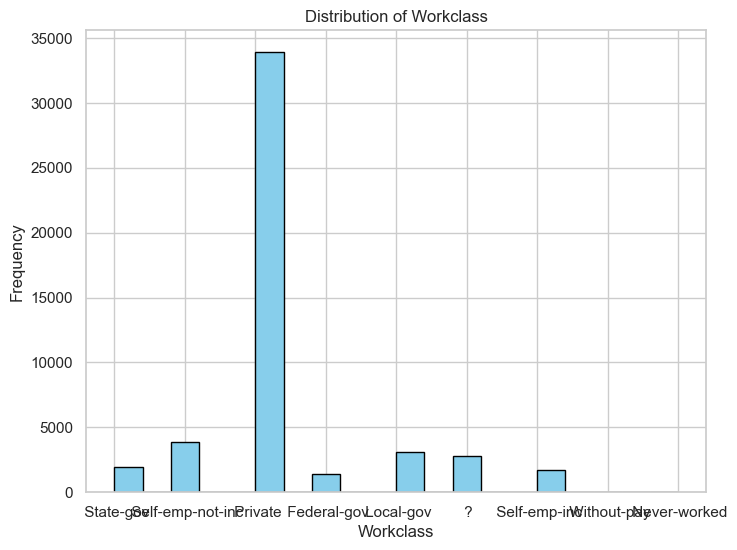

In [25]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
column_name = 'Workclass'  # You can change this to the column you want to visualize

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(data[column_name].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
'age', 'Workclass', 'fnlwgt', 'Education', 'Education_Num', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_per_Week', 'Native_Country', 'Income'

('age',
 'Workclass',
 'fnlwgt',
 'Education',
 'Education_Num',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_Week',
 'Native_Country',
 'Income')

In [63]:
data['age'].value_counts()

age
36.0    1348
35.0    1337
33.0    1335
23.0    1329
31.0    1325
        ... 
88.0       6
85.0       5
87.0       3
89.0       2
86.0       1
Name: count, Length: 74, dtype: int64

In [27]:
data['Workclass'].value_counts()

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [28]:
data['Education'].value_counts()

Education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [29]:
data['Marital_Status'].value_counts()

Marital_Status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [30]:
data['Occupation'].value_counts()

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [31]:
data['Relationship'].value_counts()

Relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [32]:
data['Race'].value_counts()

Race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [33]:
data['Native_Country'].value_counts()

Native_Country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [62]:
data['Sex'].value_counts()

Sex
Male      32650
Female    16192
Name: count, dtype: int64

In [35]:
data['Income'].value_counts()

Income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [36]:
data['Income'] = data['Income'].str.replace(".", "")

In [37]:
data['Income'].value_counts()

Income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [61]:
data.head()

age          Workclass    fnlwgt   Education  Education_Num  \
0  39.0          State-gov   77516.0   Bachelors           13.0   
1  50.0   Self-emp-not-inc   83311.0   Bachelors           13.0   
2  38.0            Private  215646.0     HS-grad            9.0   
3  53.0            Private  234721.0        11th            7.0   
4  28.0            Private  338409.0   Bachelors           13.0   

        Marital_Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital_Gain  Capital_Loss  Hours_per_Week  Native_Country  Income  
0        2174.0           0.0            40.0   United-States   <=50K  
1           0.0           0.0            13.0   United-States   <=50K  
2           0.0           0.0            40.0   United-States   <=50K  
3           0.0           0.0            40.0   United-States   <=50K  
4           0.0           0.0            40.0            Cuba   <=50K

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()

In [65]:
data['le_age']=le.fit_transform(data['age'])
data['le_workclass']=le.fit_transform(data['Workclass'])
data['le_fnlwgt']=le.fit_transform(data['fnlwgt'])
data['le_education']=le.fit_transform(data['Education'])
data['le_edu_num']=le.fit_transform(data['Education_Num'])
data['le_marital_status']=le.fit_transform(data['Marital_Status'])
data['le_occupation']=le.fit_transform(data['Occupation'])
data['le_relationship']=le.fit_transform(data['Relationship'])
data['le_race']=le.fit_transform(data['Race'])
data['le_sex']=le.fit_transform(data['Sex'])
data['le_capital_gain']=le.fit_transform(data['Capital_Gain'])
data['le_capital_loss']=le.fit_transform(data['Capital_Loss'])
data['le_working_hours']=le.fit_transform(data['Hours_per_Week'])
data['le_country']=le.fit_transform(data['Native_Country'])
data['le_income']=le.fit_transform(data['Income'])

In [67]:
data.describe()

age        fnlwgt  Education_Num  Capital_Gain  Capital_Loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       Hours_per_Week        le_age  le_workclass     le_fnlwgt  le_education  \
count    48842.000000  48843.000000  48843.000000  48843.000000  48843.000000   
mean        40.422382     21.644657      3.870544  13717.259321     10.288537   
std         12.391444     13.712416      1.464403   7945.710466      3.874539   
min          1.000000      0.000000      0.000000      0.000000      0.000000   
25%         40.000000     11.000000      4.000000   6995.500000      9.000000   
50%         40.000000     20.000000      4.000000  13523.000000     11.000000   
75%         45.000000     31.000000      4.000000  20244.500000     12.000000   
max         99.000000     74.000000      9.000000  28523.000000     16.000000   

       ...  le_marital_status  le_occupation  le_relationship       le_race  \
count  ...       48843.000000   48843.000000     48843.000000  48843.000000   
mean   ...           2.618840       6.577872         1.443380      3.668079   
std    ...           1.507817       4.230638         1.602267      0.845999   
min    ...           0.000000       0.000000         0.000000      0.000000   
25%    ...           2.000000       3.000000         0.000000      4.000000   
50%    ...           2.000000       7.000000         1.000000      4.000000   
75%    ...           4.000000      10.000000         3.000000      4.000000   
max    ...           7.000000      15.000000         6.000000      5.000000   

             le_sex  le_capital_gain  le_capital_loss  le_working_hours  \
count  48843.000000     48843.000000     48843.000000      48843.000000   
mean       0.668509         6.683885         2.236103         39.397887   
std        0.470797        24.051441        10.902694         12.297812   
min        0.000000         0.000000         0.000000          0.000000   
25%        0.000000         0.000000         0.000000         39.000000   
50%        1.000000         0.000000         0.000000         39.000000   
75%        1.000000         0.000000         0.000000         44.000000   
max        2.000000       123.000000        99.000000         96.000000   

         le_country     le_income  
count  48843.000000  48843.000000  
mean      36.749463      0.239318  
std        7.775300      0.426719  
min        0.000000      0.000000  
25%       39.000000      0.000000  
50%       39.000000      0.000000  
75%       39.000000      0.000000  
max       42.000000      2.000000  

[8 rows x 21 columns]

In [68]:
correlation_matrix = data.corr()
print(correlation_matrix)

ValueError: could not convert string to float: ' State-gov'

In [69]:
data.corr(numeric_only=True)

age    fnlwgt  Education_Num  Capital_Gain  \
age                1.000000 -0.076628       0.030940      0.077229   
fnlwgt            -0.076628  1.000000      -0.038761     -0.003706   
Education_Num      0.030940 -0.038761       1.000000      0.125146   
Capital_Gain       0.077229 -0.003706       0.125146      1.000000   
Capital_Loss       0.056944 -0.004366       0.080972     -0.031441   
Hours_per_Week     0.071558 -0.013519       0.143689      0.082157   
le_age             1.000000 -0.076628       0.030940      0.077229   
le_workclass       0.017526 -0.016546       0.055918      0.036044   
le_fnlwgt         -0.078902  0.932953      -0.037765     -0.004802   
le_education      -0.015058 -0.022570       0.359668      0.028928   
le_edu_num         0.030940 -0.038761       1.000000      0.125146   
le_marital_status -0.263978  0.029851      -0.069992     -0.043969   
le_occupation     -0.014259  0.000860       0.112265      0.024163   
le_relationship   -0.263383  0.009092      -0.090534     -0.056510   
le_race            0.028421 -0.027062       0.029239      0.011581   
le_sex             0.088120  0.027739       0.009328      0.047094   
le_capital_gain    0.126027 -0.005595       0.154481      0.612575   
le_capital_loss    0.062223 -0.005686       0.084184     -0.029696   
le_working_hours   0.071637 -0.013323       0.144799      0.082510   
le_country        -0.002861 -0.048680       0.049107     -0.001816   
le_income          0.230369 -0.006339       0.332613      0.223013   

                   Capital_Loss  Hours_per_Week    le_age  le_workclass  \
age                    0.056944        0.071558  1.000000      0.017526   
fnlwgt                -0.004366       -0.013519 -0.076628     -0.016546   
Education_Num          0.080972        0.143689  0.030940      0.055918   
Capital_Gain          -0.031441        0.082157  0.077229      0.036044   
Capital_Loss           1.000000        0.054467  0.056944      0.010880   
Hours_per_Week         0.054467        1.000000  0.071558      0.141283   
le_age                 0.056944        0.071558  1.000000      0.017795   
le_workclass           0.010880        0.141283  0.017795      1.000000   
le_fnlwgt             -0.001946       -0.013300 -0.078742     -0.018500   
le_education           0.017638        0.057659 -0.014940      0.017290   
le_edu_num             0.080972        0.143689  0.031144      0.056100   
le_marital_status     -0.033872       -0.185567 -0.263689     -0.068219   
le_occupation          0.017180        0.079986 -0.014101      0.260104   
le_relationship       -0.057201       -0.250400 -0.263100     -0.092141   
le_race                0.018595        0.039694  0.028539      0.053037   
le_sex                 0.045480        0.228560  0.088321      0.091407   
le_capital_gain       -0.060332        0.101297  0.126356      0.030155   
le_capital_loss        0.977088        0.058477  0.062857      0.015097   
le_working_hours       0.054867        0.999862  0.071970      0.141953   
le_country             0.003449        0.000705 -0.002808     -0.008581   
le_income              0.147554        0.227687  0.230617      0.052954   

                   le_fnlwgt  le_education  ...  le_marital_status  \
age                -0.078902     -0.015058  ...          -0.263978   
fnlwgt              0.932953     -0.022570  ...           0.029851   
Education_Num      -0.037765      0.359668  ...          -0.069992   
Capital_Gain       -0.004802      0.028928  ...          -0.043969   
Capital_Loss       -0.001946      0.017638  ...          -0.033872   
Hours_per_Week     -0.013300      0.057659  ...          -0.185567   
le_age             -0.078742     -0.014940  ...          -0.263689   
le_workclass       -0.018500      0.017290  ...          -0.068219   
le_fnlwgt           1.000000     -0.019901  ...           0.031190   
le_education       -0.019901      1.000000  ...          -0.037325   
le_edu_num         -0.037658      0.359714  ...          -0.06